## I-94 Interstate Highway Heavy Traffic Indicators Analyis.
This is an analysis of a dataset about the westbound traffic on the I-94 interstate highway.

The goal of this analysis is to determine a few indicators of heavy traffic on the I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, it is possible to discover that traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
i94_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
i94_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i94_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
i94_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
%matplotlib inline

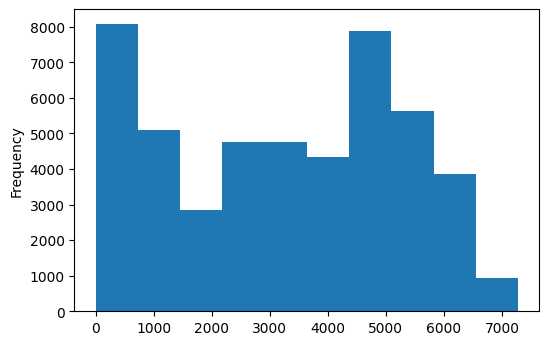

In [7]:
i94_traffic['traffic_volume'].plot.hist()

In [8]:
i94_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Using the series.describe() method on the `traffic_volume` column, it shows that on average there are 3259 vehicles westbound on the I-94 and 25% of the time, there are 1193 vehicles and on another 25% of the time there are about 4993 cars. The median traffic volume is 3380 which is not so far off from the mean.

# Isolating Daytime and Nightime Data.

Checking if daytime or night time affects the traffic. First the `date_time` column will be converted to a datetime object using the pd.to_datetime() method and then the daytime and nightime data will be isolated. For this analysis, 7am-7pm will be used as day time and 7pm to 7am as night time.

In [9]:
i94_traffic['date_time'] = pd.to_datetime(i94_traffic['date_time'])

In [10]:
i94_traffic['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [11]:
daytime_traffic = i94_traffic.copy()[(i94_traffic['date_time'].dt.hour >=7) &
                              (i94_traffic['date_time'].dt.hour <19)]

In [12]:
nighttime_traffic = i94_traffic.copy()[(i94_traffic['date_time'].dt.hour >= 19) | 
                                (i94_traffic['date_time'].dt.hour < 7)]

In [13]:
daytime_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [14]:
nighttime_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


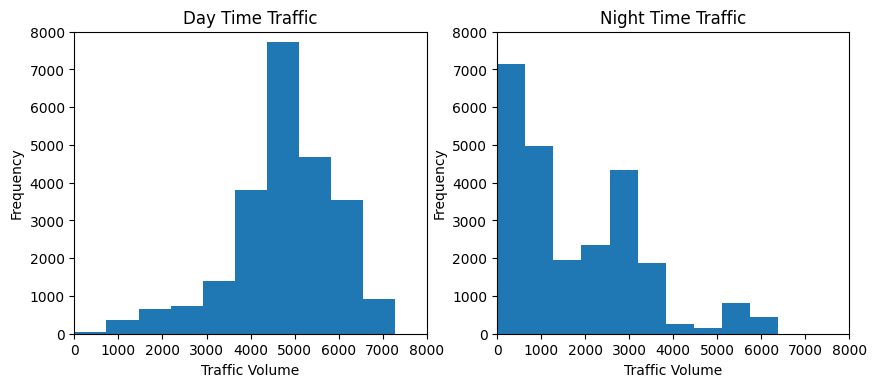

In [15]:
plt.figure(figsize= (10, 4))
plt.subplot(1, 2, 1)
plt.hist(daytime_traffic['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Day Time Traffic')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(nighttime_traffic['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Night Time Traffic')
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.show()

In [16]:
daytime_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [17]:
nighttime_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

As expected, on average, the traffic volume during the day is more than twice that of the traffic volume at night. From this, it is safe to conclude that there is rarely heavy traffic during the night and so the daytime data will be thw focus of the analysis.

# Traffic Volume by Month

In [18]:
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
month = daytime_traffic.groupby('month').mean()
month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Average Traffic Volume by Month')

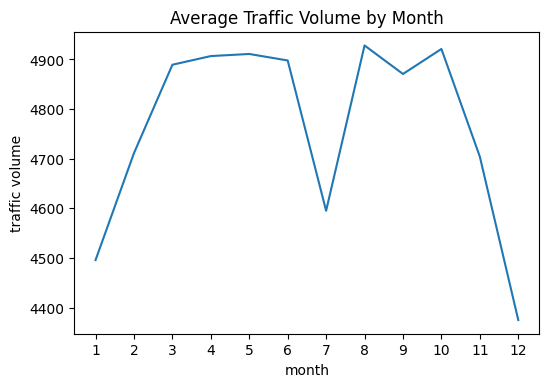

In [19]:
month['traffic_volume'].plot()
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('traffic volume')
plt.title('Average Traffic Volume by Month')

When looking at the plot above for the average traffic volume by month, it shows that traffic is usually low in January and then it increases until March where it remains constant till June before dropping in July. It rises again in August and reachecs its peak volume before dropping slightly in September and then going up a bit in October. It starts dropping again in November until it reaches its lowest in December.

# Traffic Volume by Day of The Week

In [20]:
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
day_of_week = daytime_traffic.groupby('dayofweek').mean()
day_of_week['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Average Traffic Volume by Day of Week')

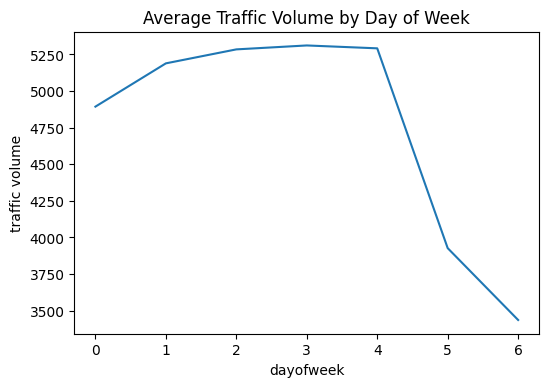

In [21]:
day_of_week['traffic_volume'].plot()
plt.ylabel('traffic volume')
plt.title('Average Traffic Volume by Day of Week')

The above plot clearly shows that the average traffic is usually reallly high during the working days and low during the weekend.

# Traffic Volume by Hour

In [22]:
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
bussiness_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] # 5 == Saturday
business_hour = bussiness_days.groupby('hour').mean()
weekend_hour = weekend.groupby('hour').mean()

print(business_hour['traffic_volume'])
print(weekend_hour['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Text(0.5, 1.0, 'Average Traffic on Weekends')

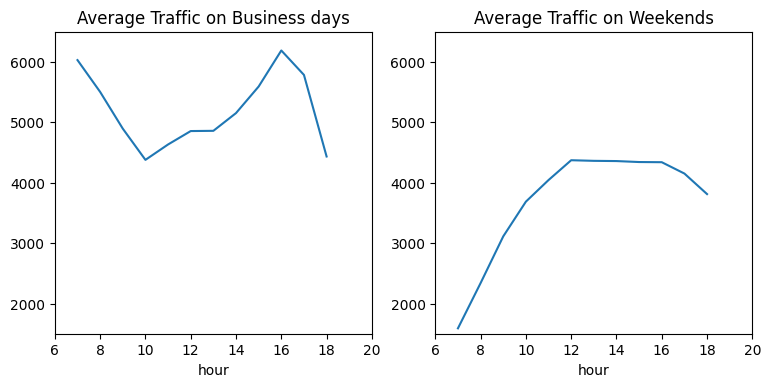

In [23]:
plt.figure(figsize=(9, 4))
plt.subplot(1,2, 1)
business_hour['traffic_volume'].plot()
plt.xlim(6, 20)
plt.ylim(1500,6500)
plt.title('Average Traffic on Business days')

plt.subplot(1,2,2)
weekend_hour['traffic_volume'].plot()
plt.xlim(6, 20)
plt.ylim(1500,6500)
plt.title('Average Traffic on Weekends')

On business days it shows that the traffic is highest around 7 and 16 which is the time people normally commute to work and back home from work. During the weekends traffic volume increases steadily from 7 until 12 and remains constannr until 16 before slightly dropping.

# Checking Weather Indicators

In [24]:
daytime_traffic.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Looking at the correletation between all the numerical columns and the traffic volume column, none of the numerical weather column has a strong correlation with the traffic volume.

In [25]:
weather_main = daytime_traffic.groupby('weather_main').mean()
weather_description = daytime_traffic.groupby('weather_description').mean()

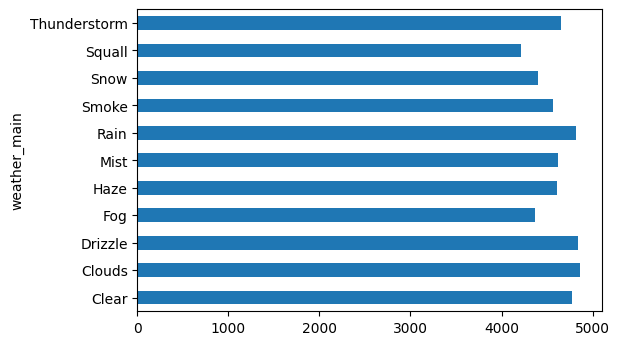

In [26]:
weather_main['traffic_volume'].plot.barh()
plt.show()


From the bar chart above, there are no weather type where the traffc volume excedes an average of 5000 cars. So it can't categorally say any of these weather types is an indicator of heavy traffic.

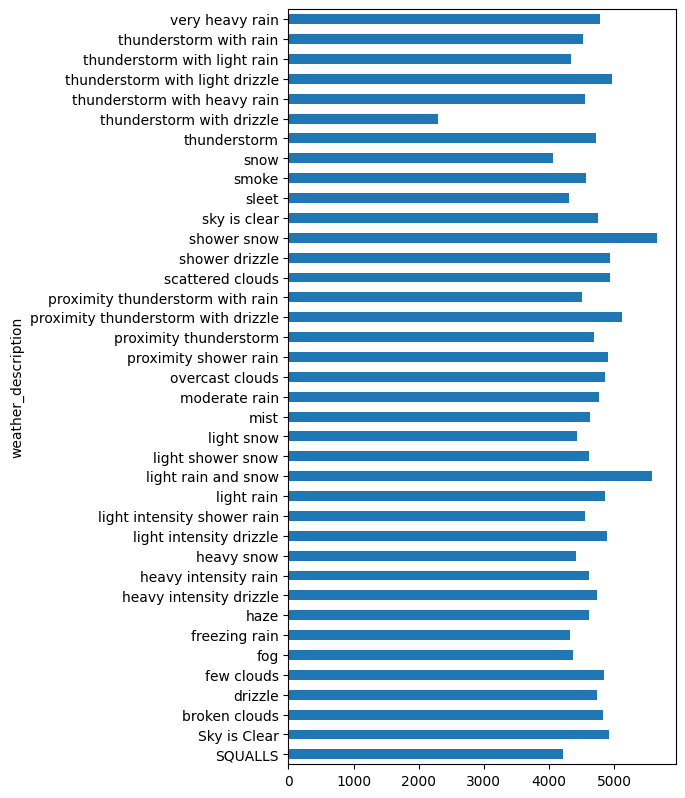

In [27]:
weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

From the above chart, it shows that there are three weather descriptions in which the traffic volume exceeds an average of 5000 cars. This includes:
1. Shower Snow.
2. Light Shower Snow and,
3. Proximity Thunderstrom with Drizzle.

# Conclusion

After analysing the dataset, it can be concluded that time is a bigger indicator of traffic volume than the weather. Whether it is the month, day of the week, or the hour. There is a strong correlation between the time and the traffic volume.

The data tells us that the traffic is highest during the months of March - June and lowest during the months of November - Frebruary. It also tells us that the traffic is heavier durng the weekdays and especially during the rush hour of 7am and 4pm.